Objective            : Product Shipment Delivered on time or not ; To Meet E-Commerce Customer Demand.        


The data contains the following information:

- ID : ID Number of Customers.
- Warehouse block : The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment :The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls : The number of calls made from enquiry for enquiry of the shipment.
- Customer rating : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product : Cost of the Product in US Dollars.
- Prior purchases : The Number of Prior Purchase.
- Product importance : The company has categorized the product in the various parameter such as low, medium, high.
- Gender : Male and Female.
- Discount offered : Discount offered on that specific product.
- Weight in gms : It is the weight in grams.
- Reached on time : It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# Import Library

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Preprocessing and Modelling
import phik
from phik.report import plot_correlation_matrix
import sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Save Modelling
import joblib
import pickle

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
df.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [5]:
#Get overview dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


This data contains 10999 rows and 12 columns that consists of 8 integer columns and 4 string columns. As we see from the overview, there are no null values.

In [6]:
#check duplicate data
print('Duplicates :', df.duplicated().sum())

Duplicates : 0


There are no duplicated data.

# EDA

In [7]:
#Shows the distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


From distribution calculation, it is known that : 
- The average of Customer rating is 3
- The variance of Product Cost are from $162 to $258
- The average of weight is 4149 gms

In [8]:
#shows the distirbution from categorical columns
df[list(df.select_dtypes(include='object'))].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


From distribution calculation, it is known that : 
- The majority of customers lives around Block F's Warehouse 
- Mostly, customers choose `Ship` as their shipment method
- Female customers make more purchases than Male customers 
- Most of the product importance are low 

Text(0.5, 1.0, 'Cost vs Weight')

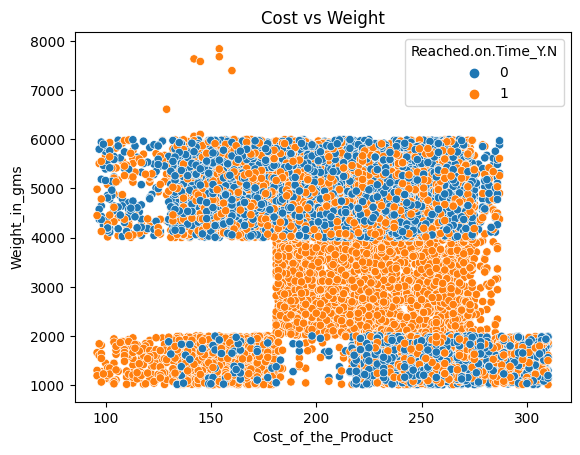

In [9]:
#create scatter plot to see corelation between purchases and payments
sns.scatterplot(data=df, x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N')
plt.title('Cost vs Weight')

The graphic shows that there are no correlation between cost and weight of the products. However, all products that weights between 2000 - 4000 gms are reached on time. Besides, all products that costs $100 - $130 are reached in time.

([<matplotlib.axis.XTick at 0x18b031571f0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

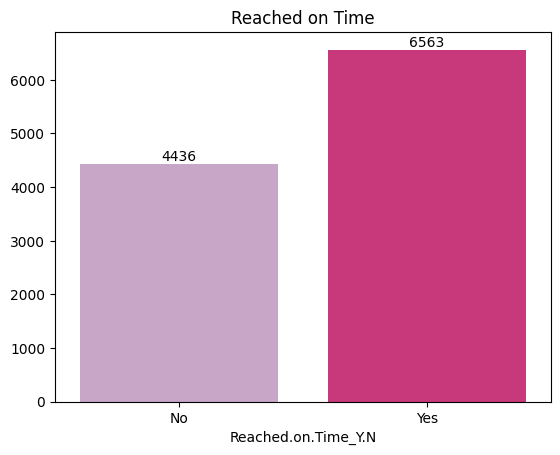

In [10]:
#shows distribution of target
reached = sns.barplot(x=df['Reached.on.Time_Y.N'].value_counts().index,
            y=df['Reached.on.Time_Y.N'].value_counts().values, palette='PuRd')

plt.bar_label(reached.containers[0])
plt.title('Reached on Time')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

it is known that from 10.999 shipment, 4436 or 40% is not shipped on time. Furthermore, we will examine further on products that are not shipped on time.

In [11]:
#querying not on time products
notontime = df.loc[df['Reached.on.Time_Y.N'] == 0]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'F'),
  Text(1, 0, 'A'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'B')])

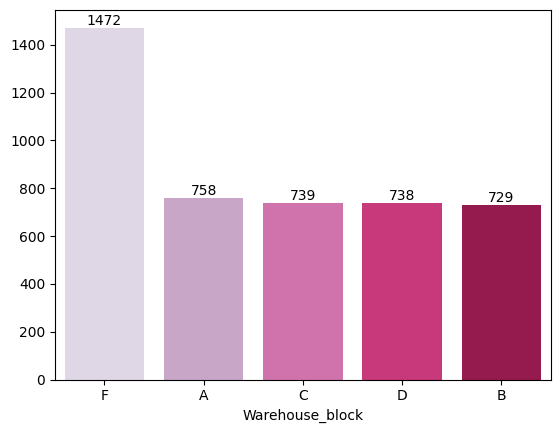

In [12]:
#group by warehouse block
wb = sns.barplot(x=notontime['Warehouse_block'].value_counts().index,
            y=notontime['Warehouse_block'].value_counts().values, palette='PuRd')

plt.bar_label(wb.containers[0])
plt.xticks()

Warehouse block that has the most not ontime shipment is Block F Warehouse. But, as we see from the data distribution before, Block F has the most customers, so these graphs can't be used as reference for imporvement.

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

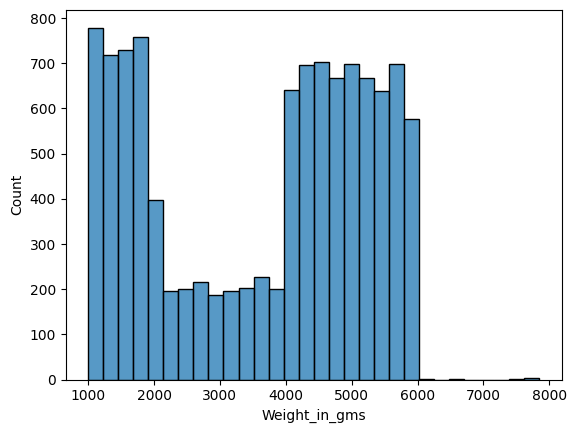

In [13]:
#shows the distribution of weight
sns.histplot(data=df, x='Weight_in_gms', bins=30, palette='Set2')


It can be known that products which weights 2000 - 4000 gms has the least amount. Besides that, we know that that products are shipped on time. This means that products that has the least amount are shipped on time. This can be used for evaluation to warehouses' team wether ther is any error in machine or human. 

(array([0, 1, 2]),
 [Text(0, 0, 'low'), Text(1, 0, 'medium'), Text(2, 0, 'high')])

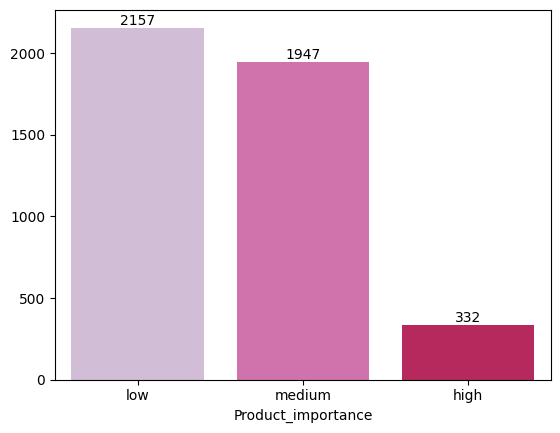

In [14]:
#group by prior purhcases
pp = sns.barplot(x=notontime['Product_importance'].value_counts().index,
            y=notontime['Product_importance'].value_counts().values, palette='PuRd')

plt.bar_label(pp.containers[0])
plt.xticks()

It has various importance of the products from low to high. But the majority from products that not shipped on time has low importance as big as 2157 products.  

(array([0, 1, 2]),
 [Text(0, 0, 'Ship'), Text(1, 0, 'Road'), Text(2, 0, 'Flight')])

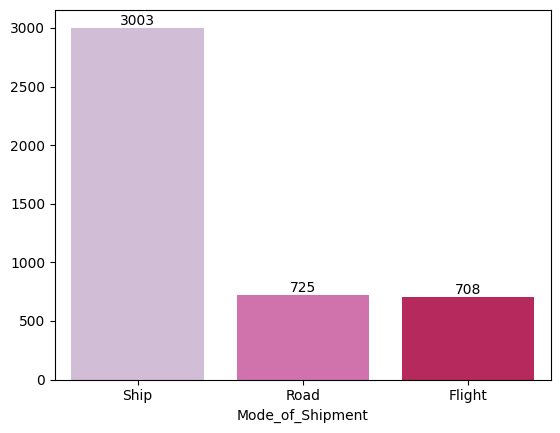

In [15]:
#group declined CC card by marital_status
ship = sns.barplot(x=notontime['Mode_of_Shipment'].value_counts().index,
            y=notontime['Mode_of_Shipment'].value_counts().values, palette='PuRd')

plt.bar_label(ship.containers[0])
plt.xticks()

`Ship` has the most not on time method of shipment. But we can't use this as a reference since the method of Shipment majority from all products are `Ship`.

# Feature Engineering

### Feature Selection

In [16]:
#Group columns which have intervals
interval_cols = ['Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms',]

#calculate correlation with phik
phik_overview = df.phik_matrix(interval_cols=interval_cols)

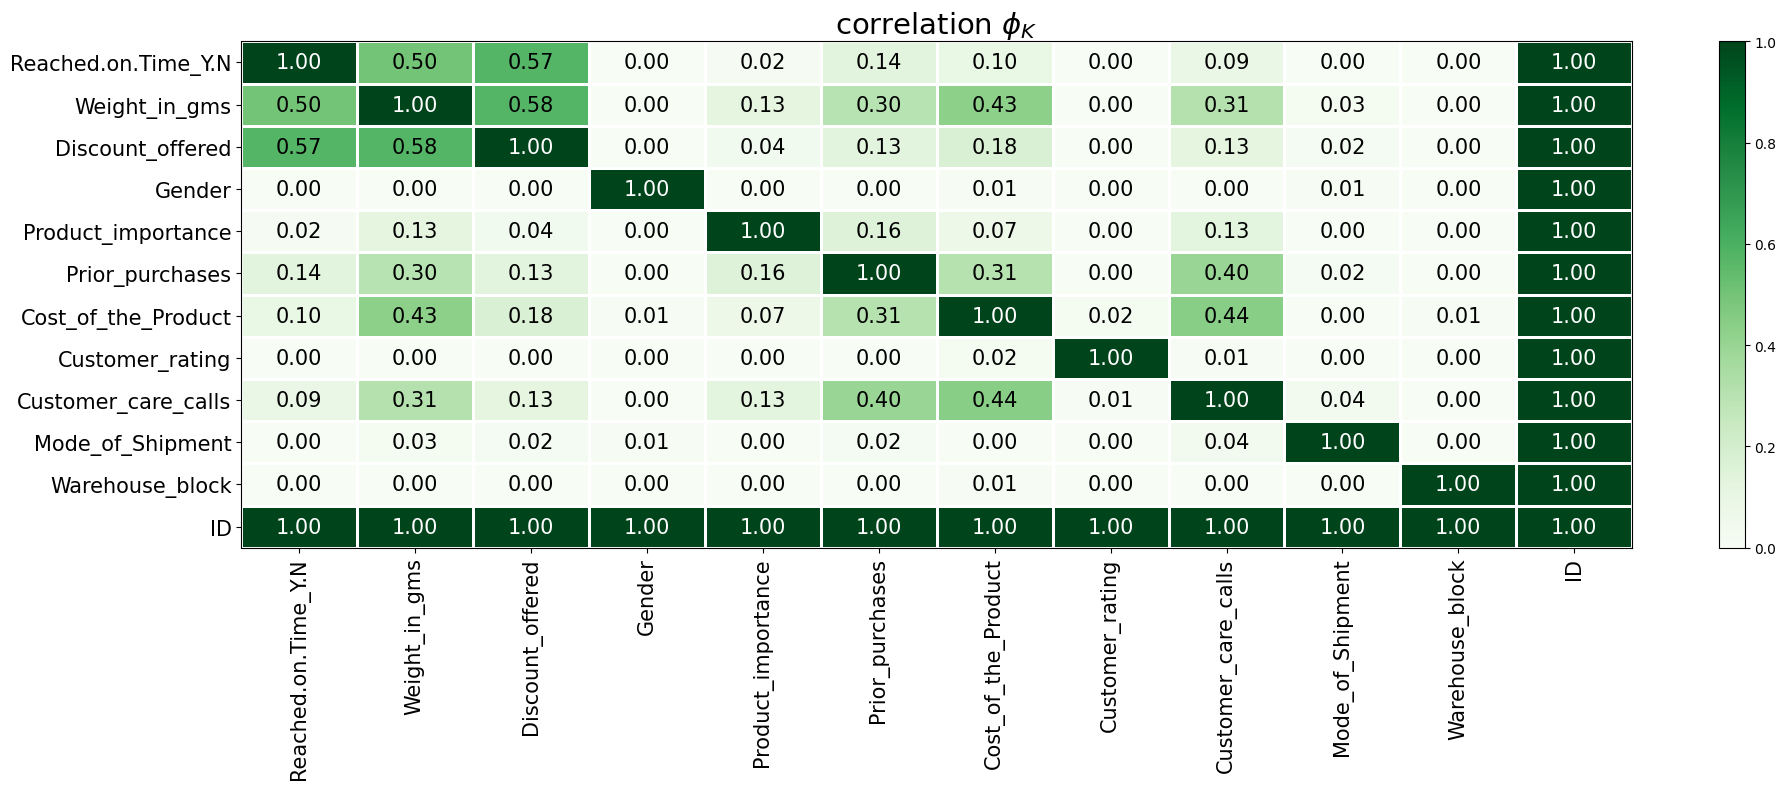

In [17]:
#Shows correlation graphs
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 8))
plt.tight_layout()

From the correlation  matrix, features/columns that has correlation (treshold=0.5) with shipment/`Reached on Time` are `Weight_in_gms`, `Discount_offered`. But we want to see how the significance matrix calculate correlation between features and target.

In [18]:
# #shows siginificance graph
# significance_overview = df.significance_matrix(interval_cols=interval_cols)


interval columns not set, guessing: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
interval columns not set, guessing: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
interval columns not set, guessing: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


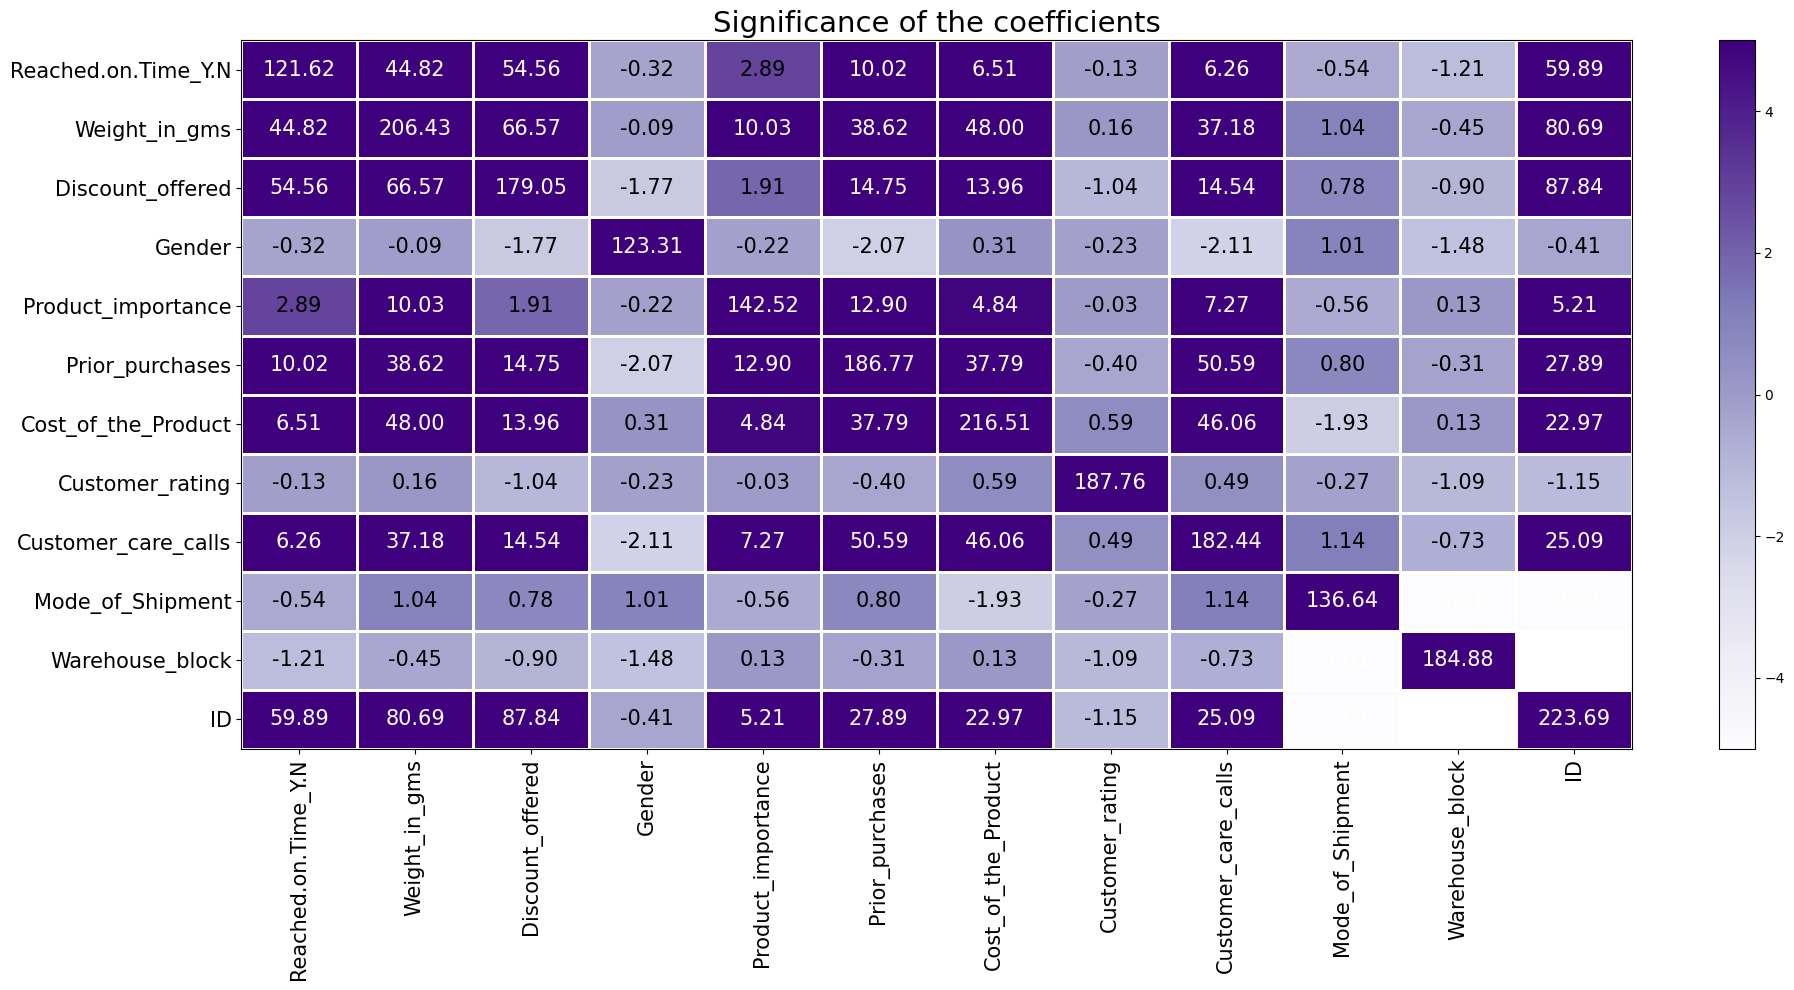

In [19]:
plot_correlation_matrix(df.significance_matrix().fillna(0).values, 
                        x_labels=df.significance_matrix().columns, 
                        y_labels=df.significance_matrix().index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(20, 10), color_map='Purples')
plt.tight_layout()

In [20]:
df.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


From the significance matrix, it shows that `Customer_care_calls`,	`Cost_of_the_Product`,	`Prior_purchases`,	`Product_importance`, `Discount_offered`, and	`Weight_in_gms` has significance correlation with `Reached.on.Time_Y.N`. After that we want to create new dataframe with these features and target columns.

In [21]:
#create new datafrane
dfnew = df[['Weight_in_gms', 'Discount_offered', 'Product_importance', 'Prior_purchases', 'Cost_of_the_Product', 'Customer_care_calls', 'Reached.on.Time_Y.N']]
dfnew

,Weight_in_gms,Discount_offered,Product_importance,Prior_purchases,Cost_of_the_Product,Customer_care_calls,Reached.on.Time_Y.N
0,1233,44,low,3,177,4,1
1,3088,59,low,2,216,4,1
2,3374,48,low,4,183,2,1
3,1177,10,medium,4,176,3,1
4,2484,46,medium,3,184,2,1
...,...,...,...,...,...,...,...
10994,1538,1,medium,5,252,4,1
10995,1247,6,medium,5,232,4,0
10996,1155,4,low,5,242,5,0
10997,1210,2,medium,6,223,5,0


In [22]:
#split categorical and numerical columns to handle cardinality and check VIF
cat = dfnew[['Product_importance']]
num = dfnew[['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product', 'Customer_care_calls', 'Prior_purchases']]

### Cardinality Check

For the categorical data, we want to check the cardinality.

In [23]:
#cardinality check
cat.nunique()

Product_importance    3
dtype: int64

There is only 3 values in column `Product Importance` that means this column has low cardinality, so we wouldn't handle it.

### VIF

For the numerical data, we want to check the VIF scores. If a column has VIF scores that more than 5, we should drop the column.

In [24]:
#VIF dengan data numerik
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vifcalculation(df):

    # menghitung VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [25]:
#VIF Calculation
vifcalculation(num)

,variables,VIF
0,Weight_in_gms,4.482598
1,Discount_offered,1.605862
2,Cost_of_the_Product,16.729226
3,Customer_care_calls,13.312730
4,Prior_purchases,6.238112


It is known that `Cost_of_the_Product` has the highest VIF score. So we would drop this column.

In [26]:
#drop cost
num.drop(columns='Cost_of_the_Product', axis=0, inplace=True)

In [27]:
#VIF Calculation
vifcalculation(num)

,variables,VIF
0,Weight_in_gms,3.725079
1,Discount_offered,1.549012
2,Customer_care_calls,7.354493
3,Prior_purchases,5.797904


After the first VIF selection, there are still two columns with VIF values above 5, namely the `customer calls` and `prior purchases` columns. Therefore, we will drop the `customer calls` column due to having the highest VIF value.

In [28]:
#drop customer calls
num.drop(columns='Customer_care_calls', inplace=True)

In [29]:
#VIF Calculation
vifcalculation(num)

,variables,VIF
0,Weight_in_gms,2.930684
1,Discount_offered,1.457970
2,Prior_purchases,3.362511


All the VIF values already under 5. So we will use these columns.

In [30]:
#create new dataframe
dfnewest = dfnew[['Weight_in_gms', 'Discount_offered', 'Prior_purchases', 'Product_importance', 'Reached.on.Time_Y.N']]

After that, we want to check the skewness of every columns.

In [31]:
#fungsi plot sebaran data
def diagnostic_plots(dfnewest, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

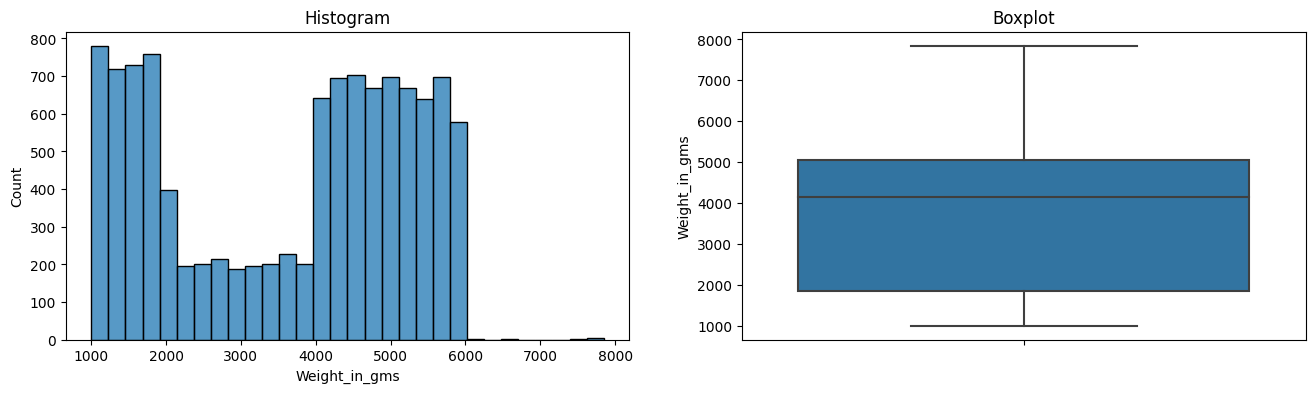


Skewness Value :  -0.2497467569788316


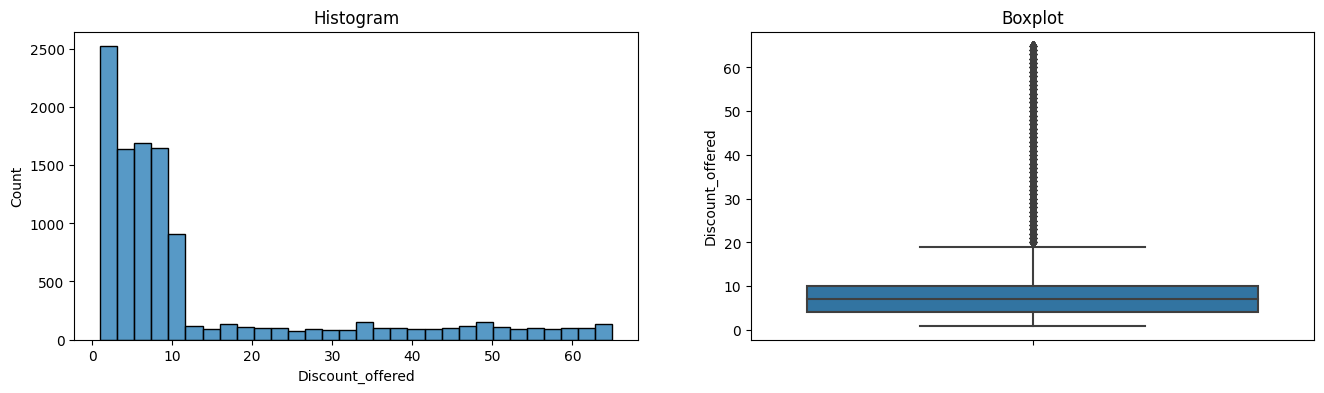


Skewness Value :  1.7989291087435189


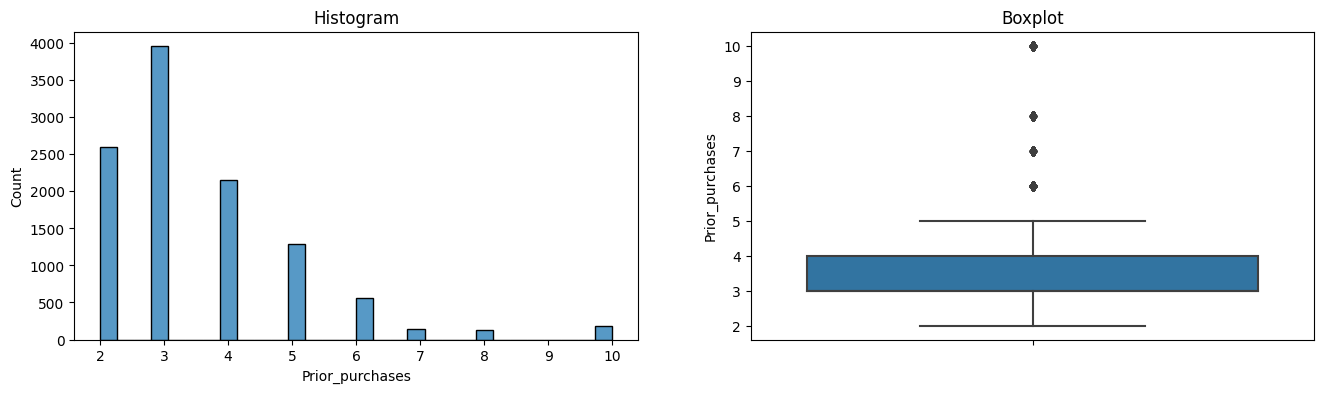


Skewness Value :  1.6818973153494547


In [32]:
#distribution of Weight
diagnostic_plots(dfnewest, 'Weight_in_gms')
print('\nSkewness Value : ', df['Weight_in_gms'].skew())

#distribution of Discount
diagnostic_plots(dfnewest, 'Discount_offered')
print('\nSkewness Value : ', df['Discount_offered'].skew())

#distribution of prior purchases
diagnostic_plots(dfnewest, 'Prior_purchases')
print('\nSkewness Value : ', df['Prior_purchases'].skew())


It was found that there are outliers in the `discount` and `prior purchases` columns with skewness values above 1, indicating a non-normal distribution and the presence of outliers. However, the `weight` column exhibits a normal distribution and does not have any outliers.

### Split

In [33]:
#Split feature and target
X = dfnewest.drop(['Reached.on.Time_Y.N'], axis=1)
y = dfnewest['Reached.on.Time_Y.N']

In [34]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#Shows train-test size
print('Train Size:', X_train.shape)
print('Test Size:', X_test .shape)

Train Size: (8799, 4)
Test Size: (2200, 4)


In [35]:
#create numerical pipeline
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

#fit transform pipeline numerikal
numpipe = num_pipeline.fit_transform(X_train[['Weight_in_gms', 'Discount_offered', 'Prior_purchases']])
numpipe

array([[0.37611086, 1.        , 0.28571429],
       [0.65928604, 0.        , 0.        ],
       [0.13405633, 1.        , 0.85714286],
       ...,
       [0.02410002, 1.        , 0.57142857],
       [0.06416629, 0.27777778, 0.85714286],
       [0.04940503, 0.44444444, 0.85714286]])

In [36]:
#create categorical pipeline
cat_pipeline = Pipeline([
        ('encoder', OrdinalEncoder(categories=[['low', 'medium', 'high']]))
    ])

#fit transform pipeline numerikal
catpipe = cat_pipeline.fit_transform(X_train['Product_importance'].values.reshape(-1, 1))
catpipe

array([[0.],
       [1.],
       [0.],
       ...,
       [2.],
       [0.],
       [0.]])

In [37]:
#merge numerical and categorical column.
full_pipe = ColumnTransformer([
        ("numcol", num_pipeline, ['Weight_in_gms', 'Discount_offered', 'Prior_purchases']),
        ("catcol", cat_pipeline, ['Product_importance'])])

X_train_Final = full_pipe.fit_transform(X_train)
X_train_Final

array([[0.37611086, 1.        , 0.28571429, 0.        ],
       [0.65928604, 0.        , 0.        , 1.        ],
       [0.13405633, 1.        , 0.85714286, 0.        ],
       ...,
       [0.02410002, 1.        , 0.57142857, 2.        ],
       [0.06416629, 0.27777778, 0.85714286, 0.        ],
       [0.04940503, 0.44444444, 0.85714286, 0.        ]])

In [38]:
#Fit transform Test model
X_test_Final = full_pipe.transform(X_test)
X_test_Final

array([[0.33950896, 0.27777778, 0.        , 1.        ],
       [0.10558819, 0.33333333, 0.28571429, 0.        ],
       [0.28377768, 1.        , 0.57142857, 0.        ],
       ...,
       [0.60430788, 0.27777778, 0.28571429, 1.        ],
       [0.07169754, 0.33333333, 0.57142857, 0.        ],
       [0.57493598, 0.33333333, 1.        , 2.        ]])

# Model

In this Machine Learning Modelling, We would define `0` on target (Shipment didn't reached on time) as Positive values and `1` (Shipment reached on time) as Negative value. We want to minimizee Products that are not shipped on time but predicted as on time. This means that we want to minimize False Negative, so the scoring used is `recall`. 

### **Support Vector Machine**

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B0571D760>


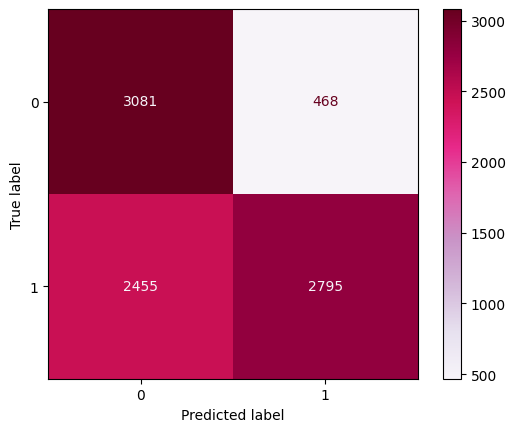

In [39]:
#svm
modelSVM = SVC(random_state=0)

modelSVM.fit(X_train_Final, y_train)

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(modelSVM, X_train_Final, y_train, cmap='PuRd'))

From the confussion matrix, we could see that SVM Model could predict false negative as many as 468 shipment. It means that model predict 4% false negative.

In [40]:
#Cross-validation SVM
svm_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', SVC(random_state=0))
    ])

scores_svm = cross_val_score(svm_pipe, X_train, y_train,
                         scoring="recall", cv=5)
                         
print('SVM Scores :', scores_svm)
print('SVM Scores Mean:', scores_svm.mean())
print('SVM Scores Std:', scores_svm.std())

SVM Scores : [0.53619048 0.53809524 0.55904762 0.49047619 0.54857143]
SVM Scores Mean: 0.5344761904761904
SVM Scores Std: 0.023471118934475222


After we cross validate, the SVM Model has average score 0.53. SVM STD Scores is 0.02. 

### **Decision Tree**

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B03235970>


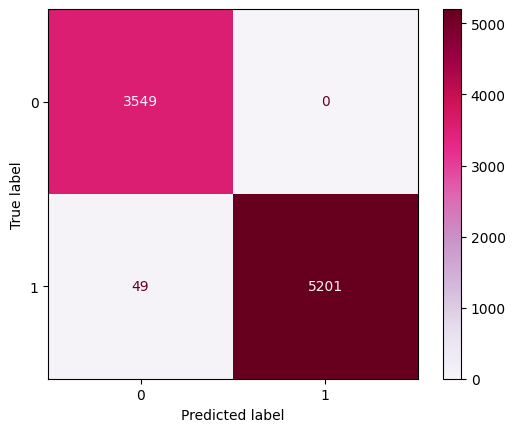

In [41]:
#decision tree
modelDT = DecisionTreeClassifier(random_state=0)

modelDT.fit(X_train_Final, y_train)

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(modelDT, X_train_Final, y_train, cmap='PuRd'))


From the confussion matrix, we could see that Decision Tree Model could predict false negative as many as 0 shipment. It means that model predict 0 false negative.

In [42]:
#Cross-validation Decision Tree
dt_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', DecisionTreeClassifier(random_state=0))
    ])

scores_dt = cross_val_score(dt_pipe, X_train, y_train,
                         scoring="recall", cv=5)
                         
print('DT Scores :', scores_dt)
print('DT Scores Mean:', scores_dt.mean())
print('DT Scores Std:', scores_dt.std())

DT Scores : [0.70190476 0.69904762 0.7047619  0.67619048 0.70857143]
DT Scores Mean: 0.6980952380952382
DT Scores Std: 0.011396781182210719


After we cross validate, the Decision Tree has average score 0.7. Decision Tree model the score of standard deviation of Decision Tree Classifier is 0.11.

### **Random Forest**

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B0559D2B0>


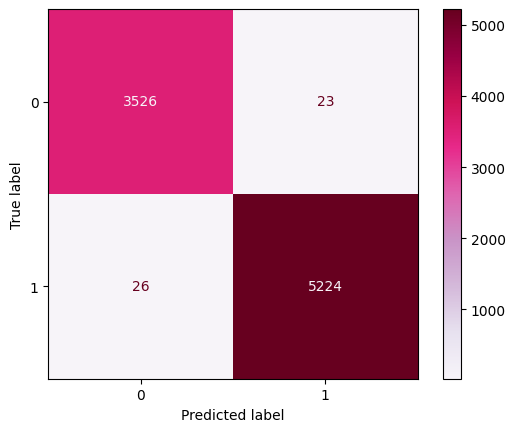

In [43]:
#random forest
modelRF = RandomForestClassifier(random_state=0)

modelRF.fit(X_train_Final, y_train)

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(modelRF, X_train_Final, y_train, cmap='PuRd'))

From the confussion matrix, we could see that Random Forest Model could predict false negative as many as 23 shipment. It means that model predict 0.2% false negative.

In [44]:
#Cross-validation random forest
rf_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', RandomForestClassifier(random_state=0))
    ])

scores_rf = cross_val_score(rf_pipe, X_train, y_train,
                         scoring="recall", cv=5)
                         
print('RF Scores :', scores_rf)
print('RF Scores Mean:', scores_rf.mean())
print('RF Scores Std:', scores_rf.std())


RF Scores : [0.68857143 0.69619048 0.67904762 0.69142857 0.70857143]
RF Scores Mean: 0.6927619047619047
RF Scores Std: 0.00968623400768846


After we cross validate, the Random Forest Model has average score 0.69. For the performance or the model, Random Forest model has 0.009 of standar deviation. 

### **Ada Boost**

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B055D7DF0>


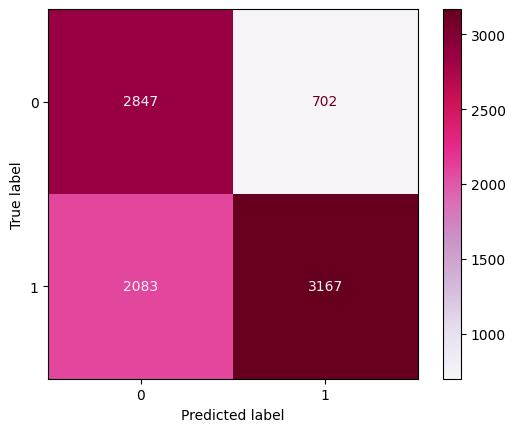

In [45]:
#boosting
modelBoost = AdaBoostClassifier(random_state=0)

modelBoost.fit(X_train_Final, y_train)

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(modelBoost, X_train_Final, y_train, cmap='PuRd'))

From the confussion matrix, we could see that AdaBoost Model could predict false negative as many as 702 shipment. It means that model predict 6% false negative.

In [46]:
#Cross-validation - AdaBoost
boost_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', AdaBoostClassifier(random_state=0))
    ])

scores_boost = cross_val_score(boost_pipe, X_train, y_train,
                         scoring="recall", cv=5)
                         
print('AdaBoost Scores :', scores_boost)
print('AdaBoost Scores Mean:', scores_boost.mean())
print('AdaBoost Scores Std:', scores_boost.std())

AdaBoost Scores : [0.60285714 0.5847619  0.58380952 0.56761905 0.62380952]
AdaBoost Scores Mean: 0.5925714285714285
AdaBoost Scores Std: 0.019193725354149517


After we cross validate, the AdaBoost Model has average score 0.6. For the performance or the model, Adaboost has 0.019 variance. it means that it has goodfit performance.

After performing comparisons of several models, the best model with the highest score and the smallest false negative predictions is the Random Forest Classifier. Besides, Random Forest Classifier has the smallest standard deviation than the other model. Next, we will proceed with` hyperparameter tuning` for the Random Forest Classifier.

## Hyperparameter Tuning 

In [47]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# # Definisi pipeline
# rf_pipe = Pipeline([
#     ('preprocess', ColumnTransformer(transformers=[
#         ('numcol', Pipeline([
#             ('outlier', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
#             ('scaler', MinMaxScaler())
#         ]), ['Weight_in_gms', 'Discount_offered', 'Prior_purchases']),
#         ('catcol', Pipeline([
#             ('encoder', OrdinalEncoder(categories=[['low', 'medium', 'high']]))
#         ]), ['Product_importance'])
#     ])),
#     ('model', RandomForestClassifier(random_state=0))
# ])

# # Definisi hyperparameter grid untuk RandomizedSearchCV
# parameters = {
#     'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'model__max_depth': [None, 5, 10, 20],   # Maximum depth of the tree
#     'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'model__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
# }

# # RandomizedSearchCV untuk hyperparameter tuning
# random_search = RandomizedSearchCV(rf_pipe, parameters, cv=5, scoring='recall', return_train_score=True)
# random_search.fit(X_train, y_train)


In [48]:
#define parameter
parameters = {
    'model__n_estimators': [100, 200, 300],           
    'model__max_depth': [None, 5, 10, 20],            
    'model__min_samples_split': [2, 5, 10],           
    'model__min_samples_leaf': [1, 2, 4] 
}

In [49]:
#define random search
random_search = RandomizedSearchCV(rf_pipe, parameters, cv=5,
                           scoring='recall',
                           return_train_score=True)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numcol',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['Weight_in_gms',
                                                                                'Discount_offered',
                                                                                'Prior_purchases']),
                                                                              ('catcol',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OrdinalEncoder(categories=[['low',
                                                                                                                            'medium',
                                                                                                                            'high']]))]),
                                                                               ['Product_importance'])])),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   param_distributions={'model__max_depth': [None, 5, 10, 20],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='recall')

In [50]:
#show best parameter
random_search.best_params_

{'model__n_estimators': 300,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 2,
 'model__max_depth': None}

It is known that the best parameters are : `n_estimator` = `100`, `min_samples_split` = `2`, `min_samples_split` = `1`, and `max_depth` = `20`

In [51]:
#show score before tuning
print('Score before tuning:', scores_rf.mean())

Score before tuning: 0.6927619047619047


In [52]:
#look for mean score
random_search.cv_results_['mean_train_score']

array([0.8607619 , 0.91385714, 0.52695238, 0.65228571, 0.83952381,
       0.52666667, 0.52533333, 0.52533333, 0.52780952, 0.83952381])

In [53]:
#show after tuning
print('Score after tuning :', ((0.52695238+0.64961905+0.66419048+0.86866667+0.99157143+0.86571429+0.5317619+0.9142381+0.65228571+0.82952381)/10))

Score after tuning : 0.7494523820000001


After we did a hyperparameter tuning, Model's score increased about 0.057. Clearly, this score is not the optimal score. This could happen due to the parameter from hyperparameter tuning is not optimal. For improvement, we should re-tune the hyperparameter until we find the most optimal score. 

## **Final Model**

In [54]:
#Cross-validation random forest
modelfinal = Pipeline([
        ('preprocess', full_pipe),
        ('model', RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=20, random_state=0))
    ])

In [55]:
#fit final model 
modelfinal.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numcol',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purchases']),
                                                 ('catcol',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('model',
                 RandomForestClassifier(max_depth=20, random_state=0))])

In [56]:
# predict model
model_train = modelfinal.predict(X_train)
model_test = modelfinal.predict(X_test)

In [57]:
#shows classification report
print("Classification Report:")
print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3549
           1       0.99      0.99      0.99      5250

    accuracy                           0.99      8799
   macro avg       0.99      0.99      0.99      8799
weighted avg       0.99      0.99      0.99      8799

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       887
           1       0.71      0.71      0.71      1313

    accuracy                           0.66      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.66      0.66      2200



In [ ]:
modelfinal
scores_rf = cross_val_score(rf_pipe, X_train, y_train,
                         scoring="recall", cv=5)
                         
print('RF Scores :', scores_rf)
print('RF Scores Mean:', scores_rf.mean())
print('RF Scores Std:', scores_rf.std())

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B03628A90>


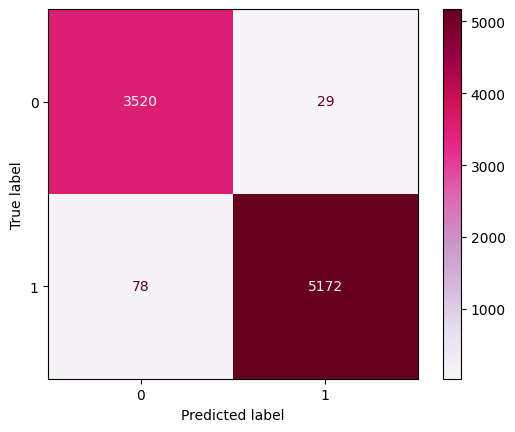

In [64]:
#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(modelfinal, X_train, y_train, cmap='PuRd'))

Based on the comparison of the training and test results, there is an overfitting issue where the training score is higher than the test score. However, this could happen because of the random_state = 0, which means that if the random state is changed, the results may vary. Based on the comparison, the RF model performs the best, with the least false negatives, and it has undergone hyperparameter tuning resulting in an improved score

# Conclusion

In the Objective, the goal of creating this model is to predict whether packages are delivered on time to improve the quality of delivery services. Among the 4 models developed, it was found that the Random Forest model performed the best as it achieved the lowest False Negative value of 0 individuals in the training data, along with the smallest standard deviation of 0.009. After that, Hyperparameter Tuning was performed to optimize the model, resulting in the best parameters: n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, and max_depth = 20, which led to an improvement of 0.057 from the default parameters. This model can make predictions with an accuracy of 0.75.

Business Insight :
- Warehouse Block F experiences more overloaded goods compared to other blocks, and most of the delayed deliveries originate from Block F. Therefore, there is a need to increase resources for Block F. Adding a new block is not recommended due to higher costs. Additionally, the other blocks, except for Block F, have relatively similar shipment volumes.
- The shipping method using ships is highly favored by customers due to its relatively lower cost. However, on the downside, shipping by sea takes the longest time to reach the customers. The suggestion is to introduce an alternative option called Ship Express, which offers faster delivery at a higher price than regular Ship, but still lower than shipping by land and flight.

# Save Model

In [58]:
#Combining pipeline with model
all_process = Pipeline([
    ("preprocess", full_pipe),
    ("classification", RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=20, random_state=0))
])

all_process.fit(X_train, y_train)
result = all_process.predict(X_test)


In [59]:
#Saving model
joblib.dump(all_process, open('shipment.pkl', 'wb'))